In [561]:
#Data Preprocessing

In [562]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("devdope/200k-spotify-songs-light-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/200k-spotify-songs-light-dataset


In [563]:
import numpy as np
import pandas as pd

df=pd.read_csv(path + "/light_spotify_dataset.csv")

In [564]:
df.head()

,artist,song,emotion,variance,Genre,Release Date,Key,Tempo,Loudness,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
0,ABBA,She's My Kind Of Girl,joy,0.447619,pop,2014,F Maj,128,-6.00,No,31,78,56,60,3,31,7,0
1,ABBA,"Andante, Andante",love,0.202222,pop,1980,A# Maj,102,-10.72,No,59,36,52,38,2,7,68,0
2,ABBA,As Good As New,sadness,0.300881,pop,1979,E Maj,139,-5.70,No,50,78,85,97,3,8,20,2
3,ABBA,Bang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0
4,ABBA,Bang-A-Boomerang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0


In [565]:
print(df.columns)
print(df.describe())

Index(['artist', 'song', 'emotion', 'variance', 'Genre', 'Release Date', 'Key',
       'Tempo', 'Loudness', 'Explicit', 'Popularity', 'Energy', 'Danceability',
       'Positiveness', 'Speechiness', 'Liveness', 'Acousticness',
       'Instrumentalness'],
      dtype='object')
            variance   Release Date          Tempo       Loudness  \
count  236988.000000  236988.000000  236988.000000  236988.000000   
mean        0.658932    2008.472826     120.609685      -8.038657   
std         0.320735      14.756158      28.966358       3.842215   
min        -1.000000    1900.000000      33.000000     -46.770000   
25%         0.833514    2002.000000      97.000000      -9.890000   
50%         0.833514    2015.000000     120.000000      -7.190000   
75%         0.833514    2019.000000     140.000000      -5.370000   
max         1.000000    2024.000000     200.000000       3.740000   

          Popularity         Energy   Danceability   Positiveness  \
count  236988.000000  236988.0000

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236988 entries, 0 to 236987
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist            236988 non-null  object 
 1   song              236980 non-null  object 
 2   emotion           236988 non-null  object 
 3   variance          236988 non-null  float64
 4   Genre             236988 non-null  object 
 5   Release Date      236988 non-null  int64  
 6   Key               236988 non-null  object 
 7   Tempo             236988 non-null  int64  
 8   Loudness          236988 non-null  float64
 9   Explicit          236988 non-null  object 
 10  Popularity        236988 non-null  int64  
 11  Energy            236988 non-null  int64  
 12  Danceability      236988 non-null  int64  
 13  Positiveness      236988 non-null  int64  
 14  Speechiness       236988 non-null  int64  
 15  Liveness          236988 non-null  int64  
 16  Acousticness      23

In [567]:
print(df.duplicated(subset=['song','Genre','Release Date']).sum())

10054


In [568]:
value_missing=df.isnull().sum()
value_missing[value_missing>0]


,0
song,8


In [569]:
df_c=df.dropna(subset=['song']) #We are optimizing the query

df_c.isnull().sum()

,0
artist,0
song,0
emotion,0
variance,0
Genre,0
Release Date,0
Key,0
Tempo,0
Loudness,0
Explicit,0


In [570]:
df_c

,artist,song,emotion,variance,Genre,Release Date,Key,Tempo,Loudness,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
0,ABBA,She's My Kind Of Girl,joy,0.447619,pop,2014,F Maj,128,-6.00,No,31,78,56,60,3,31,7,0
1,ABBA,"Andante, Andante",love,0.202222,pop,1980,A# Maj,102,-10.72,No,59,36,52,38,2,7,68,0
2,ABBA,As Good As New,sadness,0.300881,pop,1979,E Maj,139,-5.70,No,50,78,85,97,3,8,20,2
3,ABBA,Bang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0
4,ABBA,Bang-A-Boomerang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236983,(Eri Sasaki),Gate Of Steiner,sadness,0.833514,"Unknown,Unknown,Unknown",2018,D min,148,-6.44,No,41,61,41,37,4,14,20,0
236984,(Elena Tsagrinou),El Diablo,love,0.833514,"Unknown,Unknown,Unknown",2021,A min,114,-7.78,No,51,66,66,62,13,84,0,0
236985,(Dima Bilan),Believe,joy,0.833514,"Unknown,Unknown,Unknown",2009,C min,134,-6.72,No,36,73,55,24,5,22,5,0
236986,(Ani Lorak),Shady Lady,joy,0.833514,"Unknown,Unknown,Unknown",2009,F# min,128,-13.00,No,37,70,71,77,5,7,5,0


In [571]:
df_c.dtypes

,0
artist,object
song,object
emotion,object
variance,float64
Genre,object
Release Date,int64
Key,object
Tempo,int64
Loudness,float64
Explicit,object


In [572]:
# df_c['Release Date']=pd.to_datetime(df_c['Release Date'],format='%Y',errors='coerce')
print(df_c)

                              artist                   song  emotion  \
0                               ABBA  She's My Kind Of Girl      joy   
1                               ABBA       Andante, Andante     love   
2                               ABBA         As Good As New  sadness   
3                               ABBA                   Bang      joy   
4                               ABBA       Bang-A-Boomerang      joy   
...                              ...                    ...      ...   
236983                  (Eri Sasaki)        Gate Of Steiner  sadness   
236984             (Elena Tsagrinou)              El Diablo     love   
236985                  (Dima Bilan)                Believe      joy   
236986                   (Ani Lorak)             Shady Lady      joy   
236987    (Alla Pugacheva) & 50 Cent    Позови меня P.I.M.P    anger   

        variance                    Genre  Release Date     Key  Tempo  \
0       0.447619                      pop          2014   F M

In [573]:
# df_c['Year'] = df_c['Release Date'].dt.year
# df_c.head()

In [574]:
df_c.dtypes

,0
artist,object
song,object
emotion,object
variance,float64
Genre,object
Release Date,int64
Key,object
Tempo,int64
Loudness,float64
Explicit,object


In [575]:
df_c

,artist,song,emotion,variance,Genre,Release Date,Key,Tempo,Loudness,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
0,ABBA,She's My Kind Of Girl,joy,0.447619,pop,2014,F Maj,128,-6.00,No,31,78,56,60,3,31,7,0
1,ABBA,"Andante, Andante",love,0.202222,pop,1980,A# Maj,102,-10.72,No,59,36,52,38,2,7,68,0
2,ABBA,As Good As New,sadness,0.300881,pop,1979,E Maj,139,-5.70,No,50,78,85,97,3,8,20,2
3,ABBA,Bang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0
4,ABBA,Bang-A-Boomerang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236983,(Eri Sasaki),Gate Of Steiner,sadness,0.833514,"Unknown,Unknown,Unknown",2018,D min,148,-6.44,No,41,61,41,37,4,14,20,0
236984,(Elena Tsagrinou),El Diablo,love,0.833514,"Unknown,Unknown,Unknown",2021,A min,114,-7.78,No,51,66,66,62,13,84,0,0
236985,(Dima Bilan),Believe,joy,0.833514,"Unknown,Unknown,Unknown",2009,C min,134,-6.72,No,36,73,55,24,5,22,5,0
236986,(Ani Lorak),Shady Lady,joy,0.833514,"Unknown,Unknown,Unknown",2009,F# min,128,-13.00,No,37,70,71,77,5,7,5,0


In [576]:
#Can you Identify , how many duplicate values are there

In [577]:
count=df_c.duplicated(subset = ['song','emotion','Genre','Release Date','Key']).sum()
print(count)


4925


In [578]:
df_c.drop_duplicates(inplace=True)

#bhai behen or bro sis or bro's

df_c=df_c.drop_duplicates()

/tmp/ipython-input-578-3603526845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c.drop_duplicates(inplace=True)


In [579]:
df_c

,artist,song,emotion,variance,Genre,Release Date,Key,Tempo,Loudness,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
0,ABBA,She's My Kind Of Girl,joy,0.447619,pop,2014,F Maj,128,-6.00,No,31,78,56,60,3,31,7,0
1,ABBA,"Andante, Andante",love,0.202222,pop,1980,A# Maj,102,-10.72,No,59,36,52,38,2,7,68,0
2,ABBA,As Good As New,sadness,0.300881,pop,1979,E Maj,139,-5.70,No,50,78,85,97,3,8,20,2
3,ABBA,Bang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0
4,ABBA,Bang-A-Boomerang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236983,(Eri Sasaki),Gate Of Steiner,sadness,0.833514,"Unknown,Unknown,Unknown",2018,D min,148,-6.44,No,41,61,41,37,4,14,20,0
236984,(Elena Tsagrinou),El Diablo,love,0.833514,"Unknown,Unknown,Unknown",2021,A min,114,-7.78,No,51,66,66,62,13,84,0,0
236985,(Dima Bilan),Believe,joy,0.833514,"Unknown,Unknown,Unknown",2009,C min,134,-6.72,No,36,73,55,24,5,22,5,0
236986,(Ani Lorak),Shady Lady,joy,0.833514,"Unknown,Unknown,Unknown",2009,F# min,128,-13.00,No,37,70,71,77,5,7,5,0


In [580]:
#Task1: Average popularity by Emotion

#Find which emotions are associated with popular songs

In [581]:
avg_emotion = df_c.groupby('emotion')['Popularity'].mean().sort_values(ascending=False)
print(avg_emotion)

emotion
angry       56.000000
True        41.142857
anger       40.608180
joy         40.006839
surprise    39.807033
fear        39.789883
sadness     39.733065
love        39.500937
thirst      28.000000
pink        21.000000
Name: Popularity, dtype: float64


In [582]:
#Average Energy and Danceability by Genre

#Find out the most energetic and danceable genre

avg_energy_dance = df_c.groupby('Genre')[['Energy', 'Danceability']].mean().sort_values(by=['Energy', 'Danceability'], ascending=[False, False])
print(avg_energy_dance)

                                          Energy  Danceability
Genre                                                         
noise,industrial,experimental              100.0          50.0
eurobeat,anime,Initial D                   100.0          48.0
hardcore,hatecore,i hate people too        100.0          35.0
noise rock,experimental,noise              100.0          24.0
punk,street punk,hardcore                   99.5          40.0
...                                          ...           ...
nick and norah,irish,melancholy              1.0          69.0
gregorian,Classical,Tinsel                   1.0          27.0
female,late night,contemporary classical     1.0          12.0
female,sexy,C                                1.0           7.0
piano,minimalism,post-rock                   0.0          41.0

[2562 rows x 2 columns]


In [583]:
#Top Artist by songs count

In [584]:
artist = df_c.groupby('artist')['song'].count().sort_values(ascending=False)
print(artist)

artist
Genius English Translations     1604
Lil Wayne                        753
Juice WRLD                       647
Chris Brown                      589
Gucci Mane                       522
                                ... 
  (Alla Pugacheva) & 50 Cent       1
 (Hitomi Kuroishi)                 1
 (Inoue J)                         1
 (Joey Yung)                       1
 (Yuki Hayashi)                    1
Name: song, Length: 30607, dtype: int64


In [585]:
songs = df_c[df_c['artist'] == 'Shawn Mendes']
songs

,artist,song,emotion,variance,Genre,Release Date,Key,Tempo,Loudness,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
99236,Shawn Mendes,Theres Nothing Holdin Me Back,joy,0.833514,pop,2017,B min,122,-4.06,No,86,81,87,97,6,8,38,0
99237,Shawn Mendes,In My Blood,fear,0.833514,pop,2018,F Maj,140,-7.32,No,74,71,62,49,7,13,6,0
99238,Shawn Mendes,Treat You Better,love,0.833514,pop,2017,A# min,83,-4.08,No,85,82,44,75,34,11,11,0
99239,Shawn Mendes,Lost in Japan,sadness,0.833514,pop,2018,A# Maj,105,-6.78,No,71,74,71,42,37,11,26,0
99240,Shawn Mendes,If I Cant Have You,sadness,0.833514,pop,2019,D Maj,124,-4.20,No,73,82,69,87,6,13,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99319,Shawn Mendes,Where Were You in the Morning? Acoustic,joy,0.833514,pop,2018,G Maj,88,-7.47,No,56,52,72,47,6,10,55,0
99320,Shawn Mendes,LeeAnne,joy,0.833514,pop,2017,A# min,83,-4.08,No,86,82,44,75,34,11,11,0
99321,Shawn Mendes,Lonely,sadness,0.833514,pop,2021,A# min,75,-6.66,No,11,74,74,74,9,5,2,0
99322,Shawn Mendes,I Dont Even Know Your Name / Aftertaste / Kid ...,joy,0.833514,pop,2016,D Maj,170,-6.10,No,31,79,38,47,5,56,7,0


In [586]:
loudest_artist = df_c.groupby('artist')['Loudness'].mean().sort_values(ascending = False)
loudest_artist

,Loudness
artist,
1 800 PAIN,2.49
MC MENTAL,1.68
Culture Shock,1.65
Bear bear & friends,1.59
Gill Chang & Rahn Harper,1.59
...,...
Iseo & Dodosound,-39.05
Pizzicato Five,-39.22
A-Q & M.I Abaga,-42.43


In [587]:
#loudest song
df_c[['song', 'Loudness']].sort_values(by='Loudness', ascending=False).head(10)

,song,Loudness
79934,Your Pretty Face Is Going to Hell,3.74
8168,Your Pretty Face Is Going To Hell,3.74
236296,LURK,3.51
146026,MONDAY GUNDAY,2.62
94563,BOGATA,2.33
146003,DONT TREAD ON ME,2.32
100919,Red Light,2.04
8106,Death Trip,1.96
100945,TERRAFXRM.,1.83
101005,MAKING A KILLING.,1.82


In [588]:
# Top 5 emotions by average positiveness
df_c.groupby('emotion')['Positiveness'].mean().sort_values(ascending=False).head(5)

,Positiveness
emotion,
thirst,54.000000
joy,49.537835
love,48.922434
anger,48.469697
surprise,47.714408


In [589]:
#how many songs released by an artist in a year
df_c.groupby(['artist', 'Release Date'])['song'].count().sort_values(ascending=False)

artist                       Release Date
Genius English Translations  2019            393
Juice WRLD                   2020            208
Genius English Translations  2021            182
                             2022            175
Juice WRLD                   2019            166
                                            ... 
will.i.am                    2011              1
                             2010              1
                             1966              1
yvngxchris                   2020              1
yung cxreal & baby frankie   2023              1
Name: song, Length: 71040, dtype: int64

In [590]:
#how many are in emotion joy
joy = df_c[df_c['emotion'] == 'joy']
print(joy)

                 artist                   song emotion  variance  \
0                  ABBA  She's My Kind Of Girl     joy  0.447619   
3                  ABBA                   Bang     joy  0.355000   
4                  ABBA       Bang-A-Boomerang     joy  0.355000   
11                 ABBA          Dancing Queen     joy  0.169307   
12                 ABBA            Disillusion     joy -0.022531   
...                 ...                    ...     ...       ...   
236978    (Olga Buzova)      Not Enough For Me     joy  0.833514   
236981      (Ivan Dorn)                Collaba     joy  0.833514   
236982      (Ivan Dorn)                Beverly     joy  0.833514   
236985     (Dima Bilan)                Believe     joy  0.833514   
236986      (Ani Lorak)             Shady Lady     joy  0.833514   

                          Genre  Release Date     Key  Tempo  Loudness  \
0                           pop          2014   F Maj    128     -6.00   
3                           pop    

In [591]:
df_c.groupby('song')[['Popularity','Genre']].max()

,Popularity,Genre
song,,
A New Kind of Sexy bonus track,72,rap
Delinquents,43,metal
It Was U,21,pop
Smoke In My Eyes,66,"Unknown,Unknown,Unknown"
john,28,"Unknown,Unknown,Unknown"
...,...,...
’ Cosmic ’ .m4a,68,"Unknown,Unknown,Unknown"
’Til We Get It Right,55,"Unknown,Unknown,Unknown"
♡ Human Heart,59,"Unknown,Unknown,Unknown"


In [592]:
# #What year had the highest number of hit songs?
# df_c.groupby(df_c['Release Date'].dt.year)['song'].sum().sort_values(ascending=False)

In [593]:
# Key used max for in different generes

Key_used = df_c.groupby('Genre')['Key'].max().sort_values(ascending=False)
Key_used

,Key
Genre,
"emo,indie,acoustic",G# min
"anime,Unknown,Unknown",G# min
"rnb,slow jams,Ginuwine",G# min
"acoustic,Unknown,Unknown",G# min
"country,classic country,50s",G# min
...,...
"Eurovision,dance,2010s",A Maj
"Fave,Unknown,Unknown",A Maj
"beats,frauen und technik,Unknown",A Maj


In [594]:
#top 10 song and there relation between release date and popularity :

top_10_songs = df_c.sort_values(by=['Release Date', 'Popularity'], ascending=False).head(10)
print(top_10_songs[['song', 'Release Date', 'Popularity']])

                    song  Release Date  Popularity
219928   Maybe The Night          2024         100
219929            Leaves          2024         100
219930         Ride Home          2024         100
219931          Lifetime          2024         100
219932  Make It With You          2024         100
219933              Fall          2024         100
219934           SUNRISE          2024         100
219935              Ours          2024         100
219936               War          2024         100
219937             Doors          2024         100


In [595]:
#i did my analysis on which artisit has most positive dsongs :


art_positivity=df_c.groupby('artist')['Positiveness'].max().sort_values(ascending=False)
art_positivity

,Positiveness
artist,
BoyWithUke,99
Genius English Translations,99
Wishbone Ash,99
Ramones,99
RecD,99
...,...
Rae the Producer,0
Ar'mon & Trey,0
Armon & Trey & Queen Naija,0


In [596]:
# Most Acoustic vs. Instrumental Songs
most_acoustic = df_c[df_c['Acousticness'] > 70].sort_values(by='Acousticness', ascending=False)[['artist', 'song', 'Acousticness']].head(5)
most_instrumental = df_c[df_c['Instrumentalness'] > 70].sort_values(by='Instrumentalness', ascending=False)[['artist', 'song', 'Instrumentalness']].head(5)

print("Most Acoustic Songs:\n", most_acoustic)
print("Most Instrumental Songs:\n", most_instrumental)

Most Acoustic Songs:
                        artist                   song  Acousticness
221577                 Barbie  If You Love Me For Me           100
221578                 Barbie          The Cats Meow           100
199218  Daniel A. Butterfield                   Taps           100
176299        Graham Phillips    13 / Becoming a Man           100
194042           Domo Genesis            Benediction           100
Most Instrumental Songs:
              artist                  song  Instrumentalness
64189      YUNGBLUD                Eulogy               100
181416       G-Eazy             Interlude               100
209805   Caspar Lee  STOP THE DISS TRACKS               100
56277           Who           Sound Round               100
206642  Chris Brown            Red Lights               100


In [597]:
df['Energy'].max()

100

Text(0.5, 1.0, 'Energy Distribution')

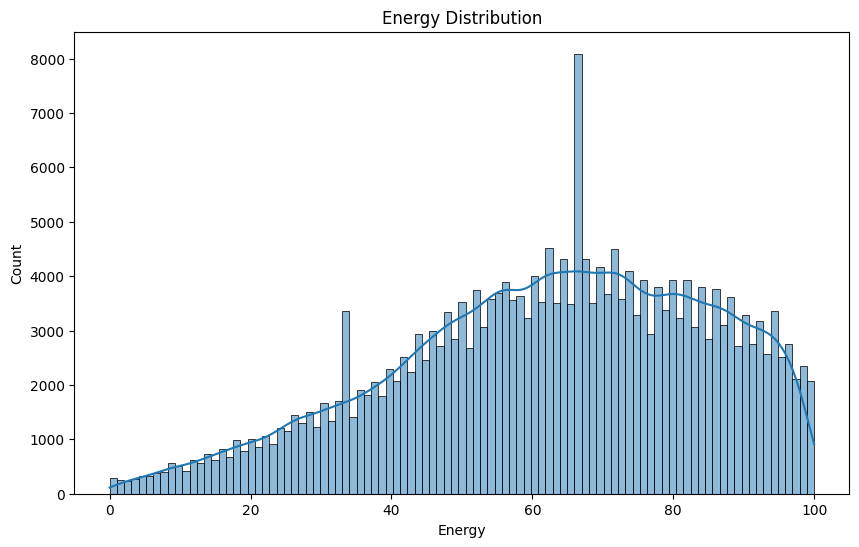

In [598]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['Energy'], kde=True)
plt.title("Energy Distribution")

Text(0.5, 1.0, 'Popularity')

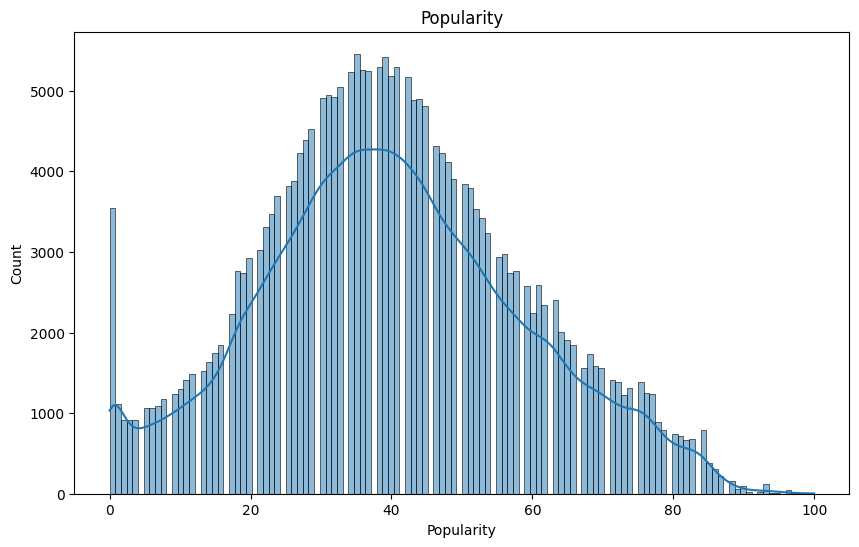

In [599]:
plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'], kde=True)
plt.title("Popularity")

Text(0.5, 1.0, 'Explicit')

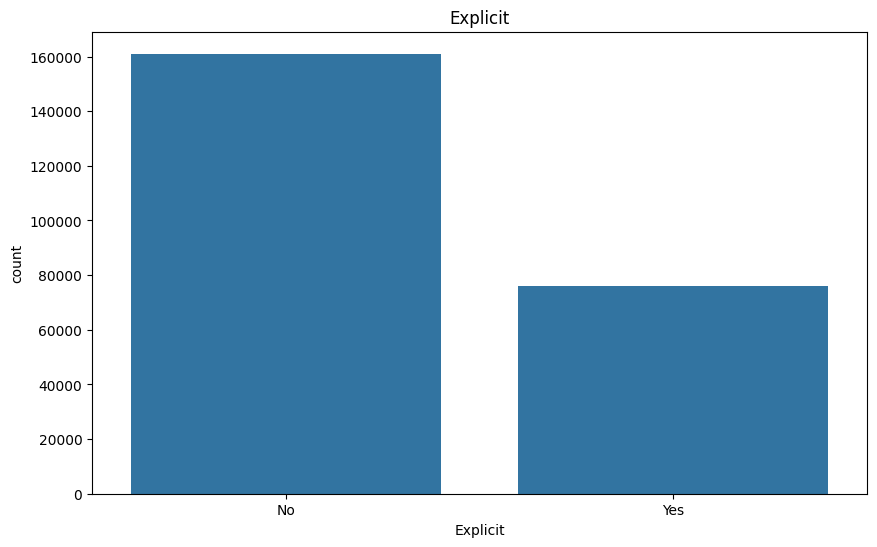

In [600]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Explicit')
plt.title("Explicit")

Text(0.5, 1.0, 'emotion')

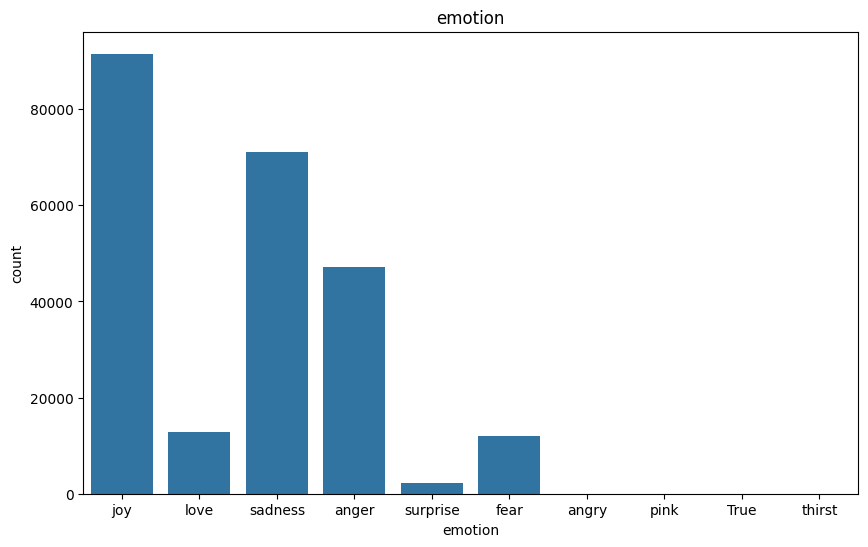

In [601]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='emotion')
plt.title("emotion")

Text(0.5, 1.0, 'Co-Variance Analysis of Numeric Features')

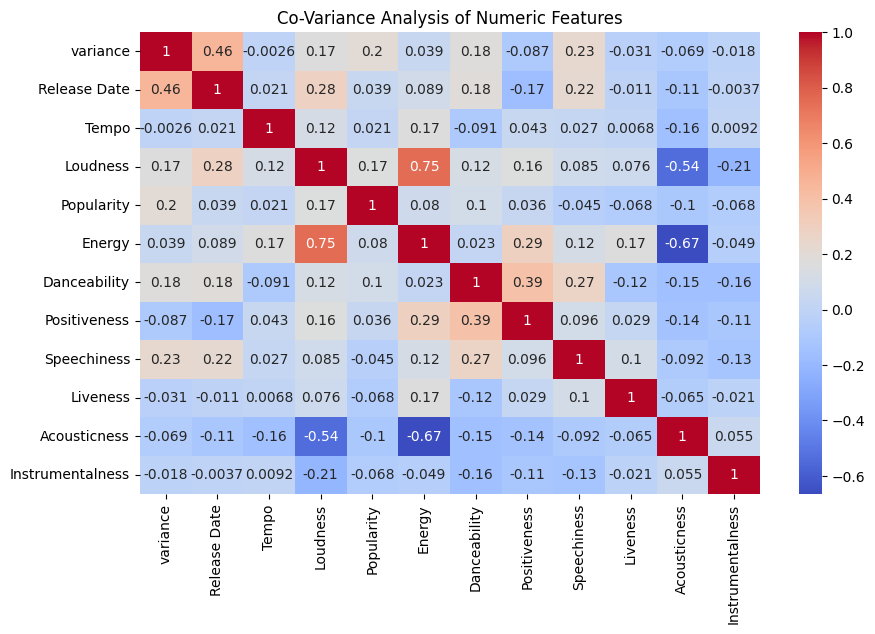

In [602]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Co-Variance Analysis of Numeric Features")

In [603]:
print(df['Loudness'].min())
print(df['Loudness'].max())

print(df['Popularity'].min())
print(df['Popularity'].max())

-46.77
3.74
0
100


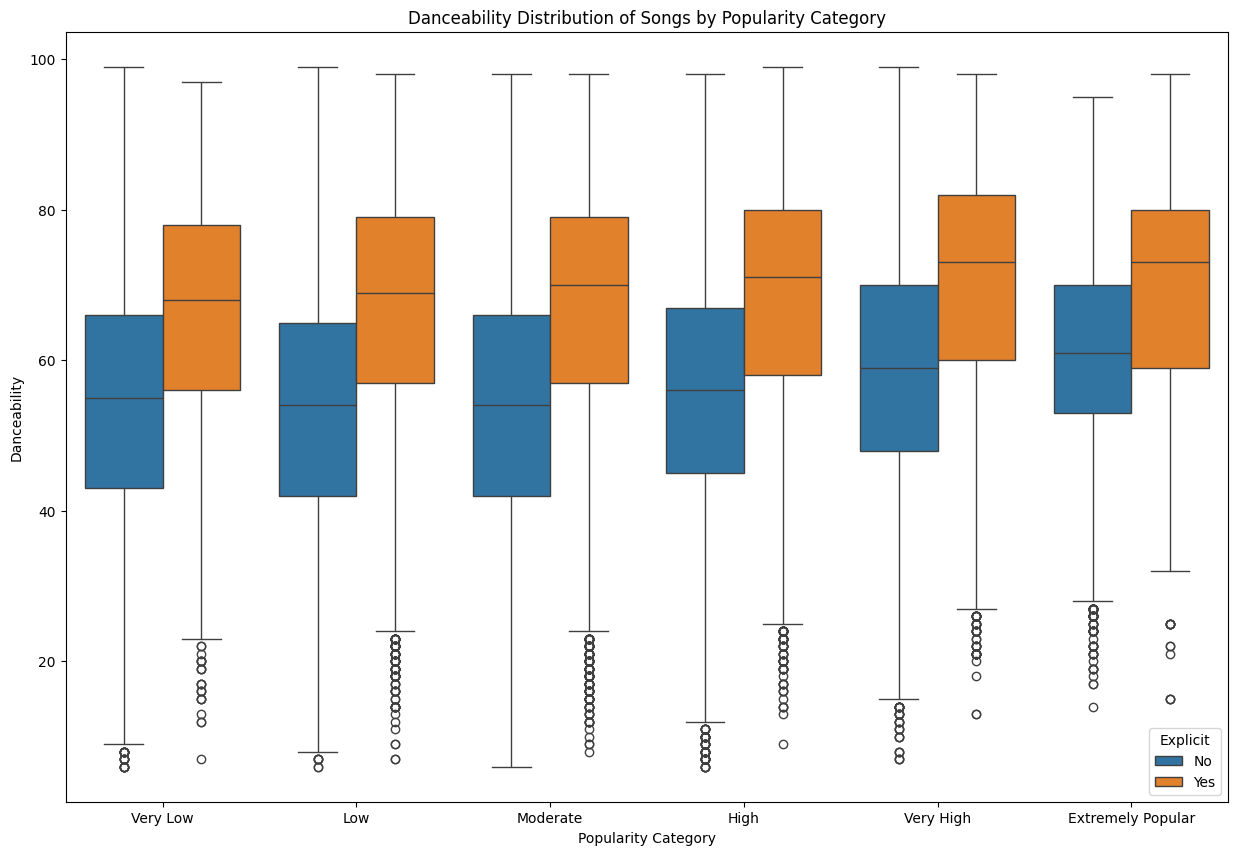

In [604]:
df['PopularityBin'] = pd.cut(df['Popularity'], bins=[0, 15, 30, 45, 60, 75, 100],
                      labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely Popular'],include_lowest=True)
plt.figure(figsize=(15,10))
sns.boxplot(data = df, x='PopularityBin',y='Danceability',hue='Explicit')
plt.title("Danceability Distribution of Songs by Popularity Category")
plt.xlabel('Popularity Category')
plt.ylabel('Danceability')
plt.show()

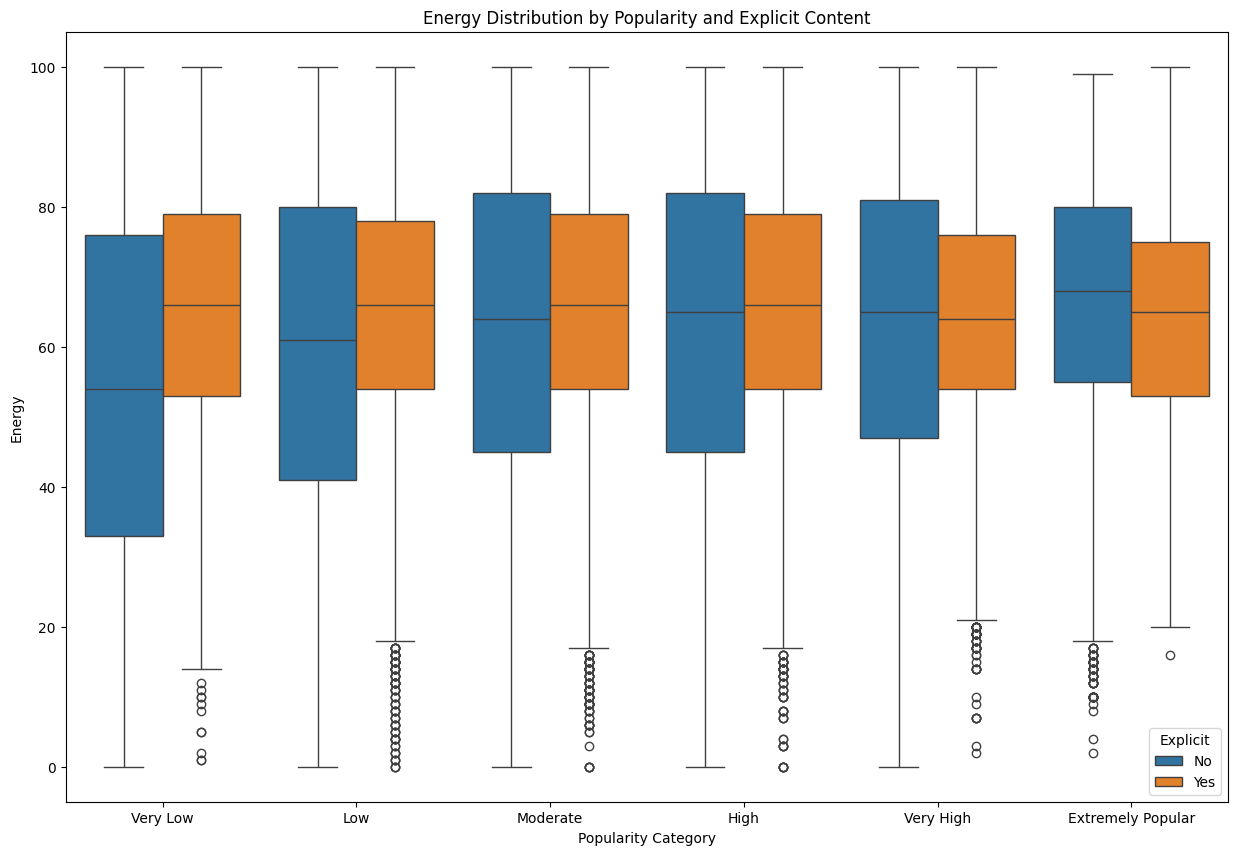

In [605]:
df['PopularityBin'] = pd.cut(df['Popularity'], bins=[0, 15, 30, 45, 60, 75, 100],
                      labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely Popular'],include_lowest=True)
plt.figure(figsize=(15,10))
sns.boxplot(data = df, x='PopularityBin',y='Energy',hue='Explicit')
plt.title("Energy Distribution by Popularity and Explicit Content")
plt.xlabel('Popularity Category')
plt.ylabel('Energy')
plt.show()

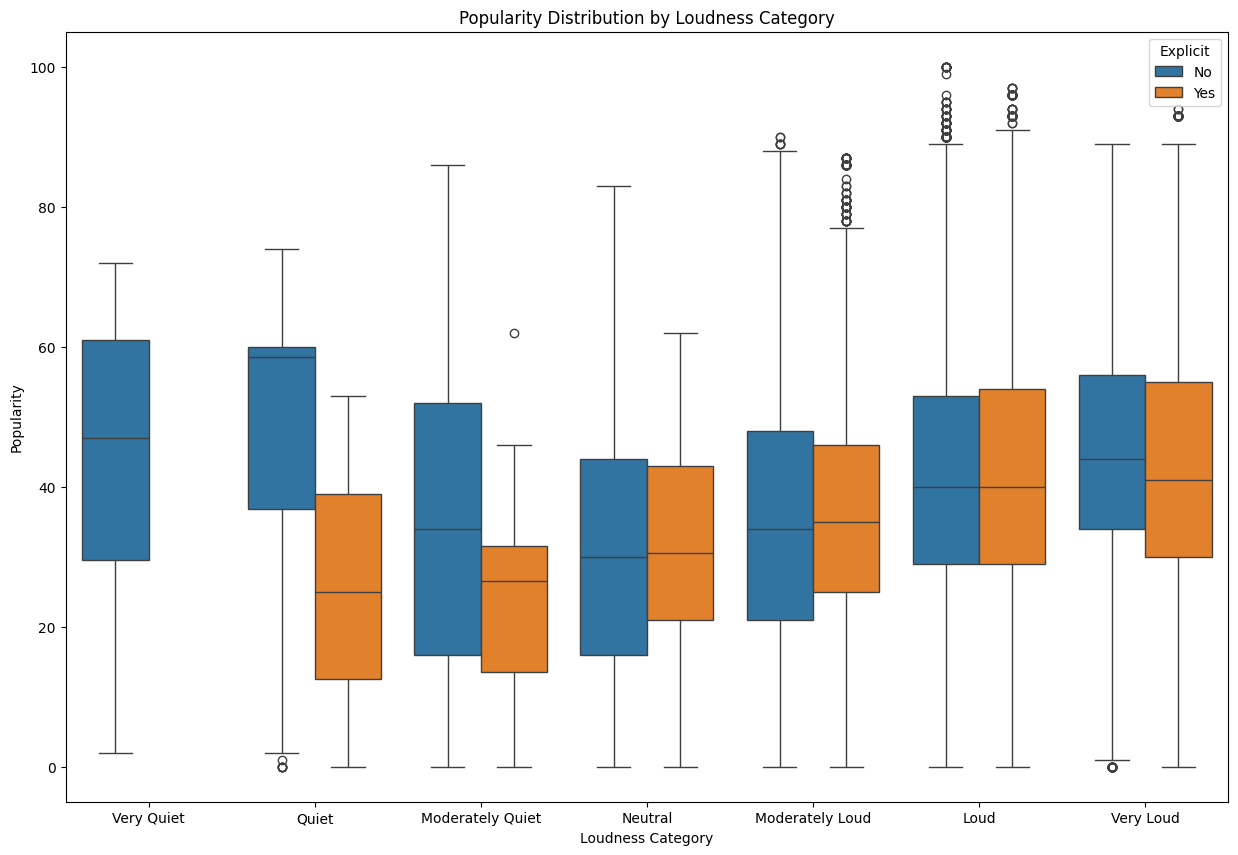

In [606]:
loudness_bins = np.linspace(-50,5,num=8)
loudness_labels = ['Very Quiet','Quiet','Moderately Quiet','Neutral','Moderately Loud','Loud','Very Loud']

df['LoudnessBin'] = pd.cut(df['Loudness'], bins=loudness_bins,
                      labels=loudness_labels,include_lowest=True)

plt.figure(figsize=(15,10))
sns.boxplot(data = df, x='LoudnessBin',y='Popularity',hue='Explicit')
plt.title("Popularity Distribution by Loudness Category")
plt.xlabel('Loudness Category')
plt.ylabel('Popularity')
plt.show()

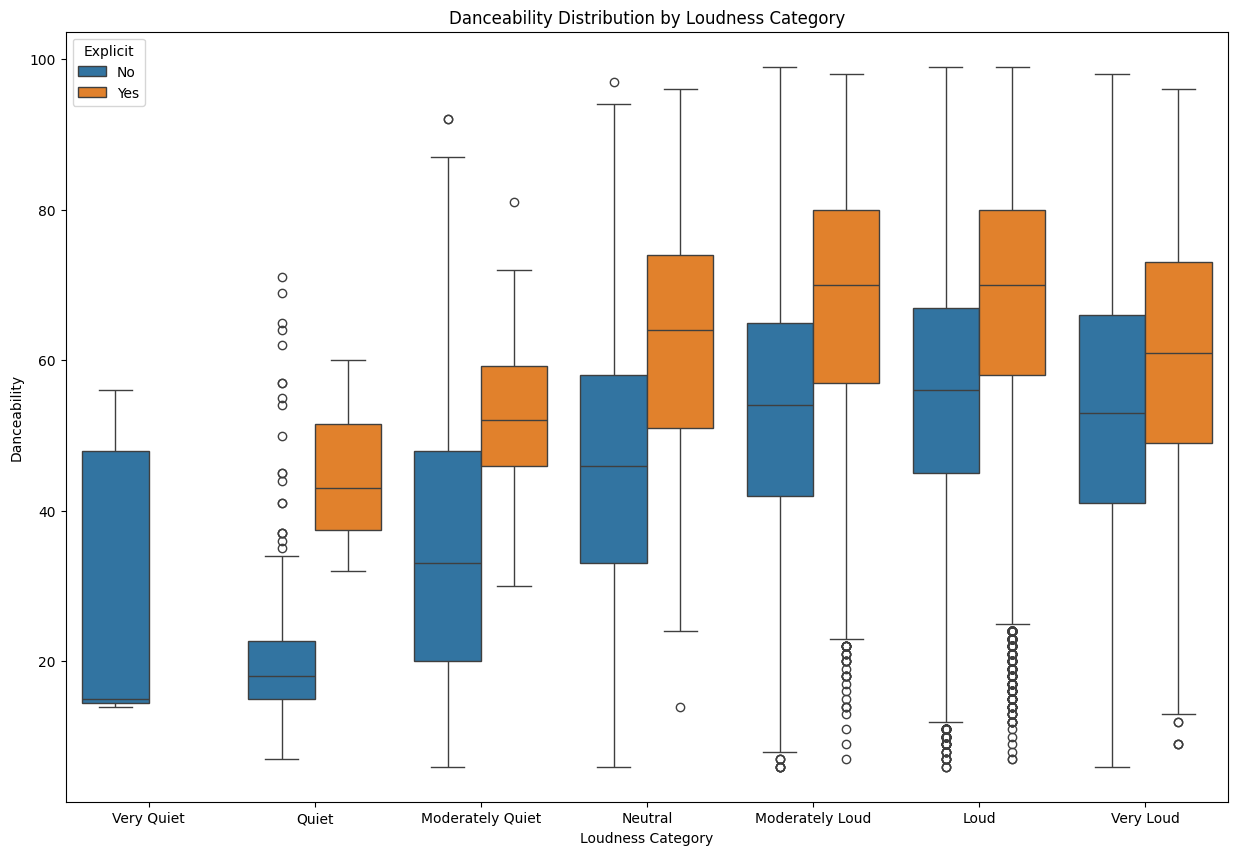

In [607]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df, x='LoudnessBin',y='Danceability',hue='Explicit')
plt.title("Danceability Distribution by Loudness Category")
plt.xlabel('Loudness Category')
plt.ylabel('Danceability')
plt.show()

Text(0.5, 0.98, 'Danceability Distribution by Loudness and Explicit Content across Popularity Levels')

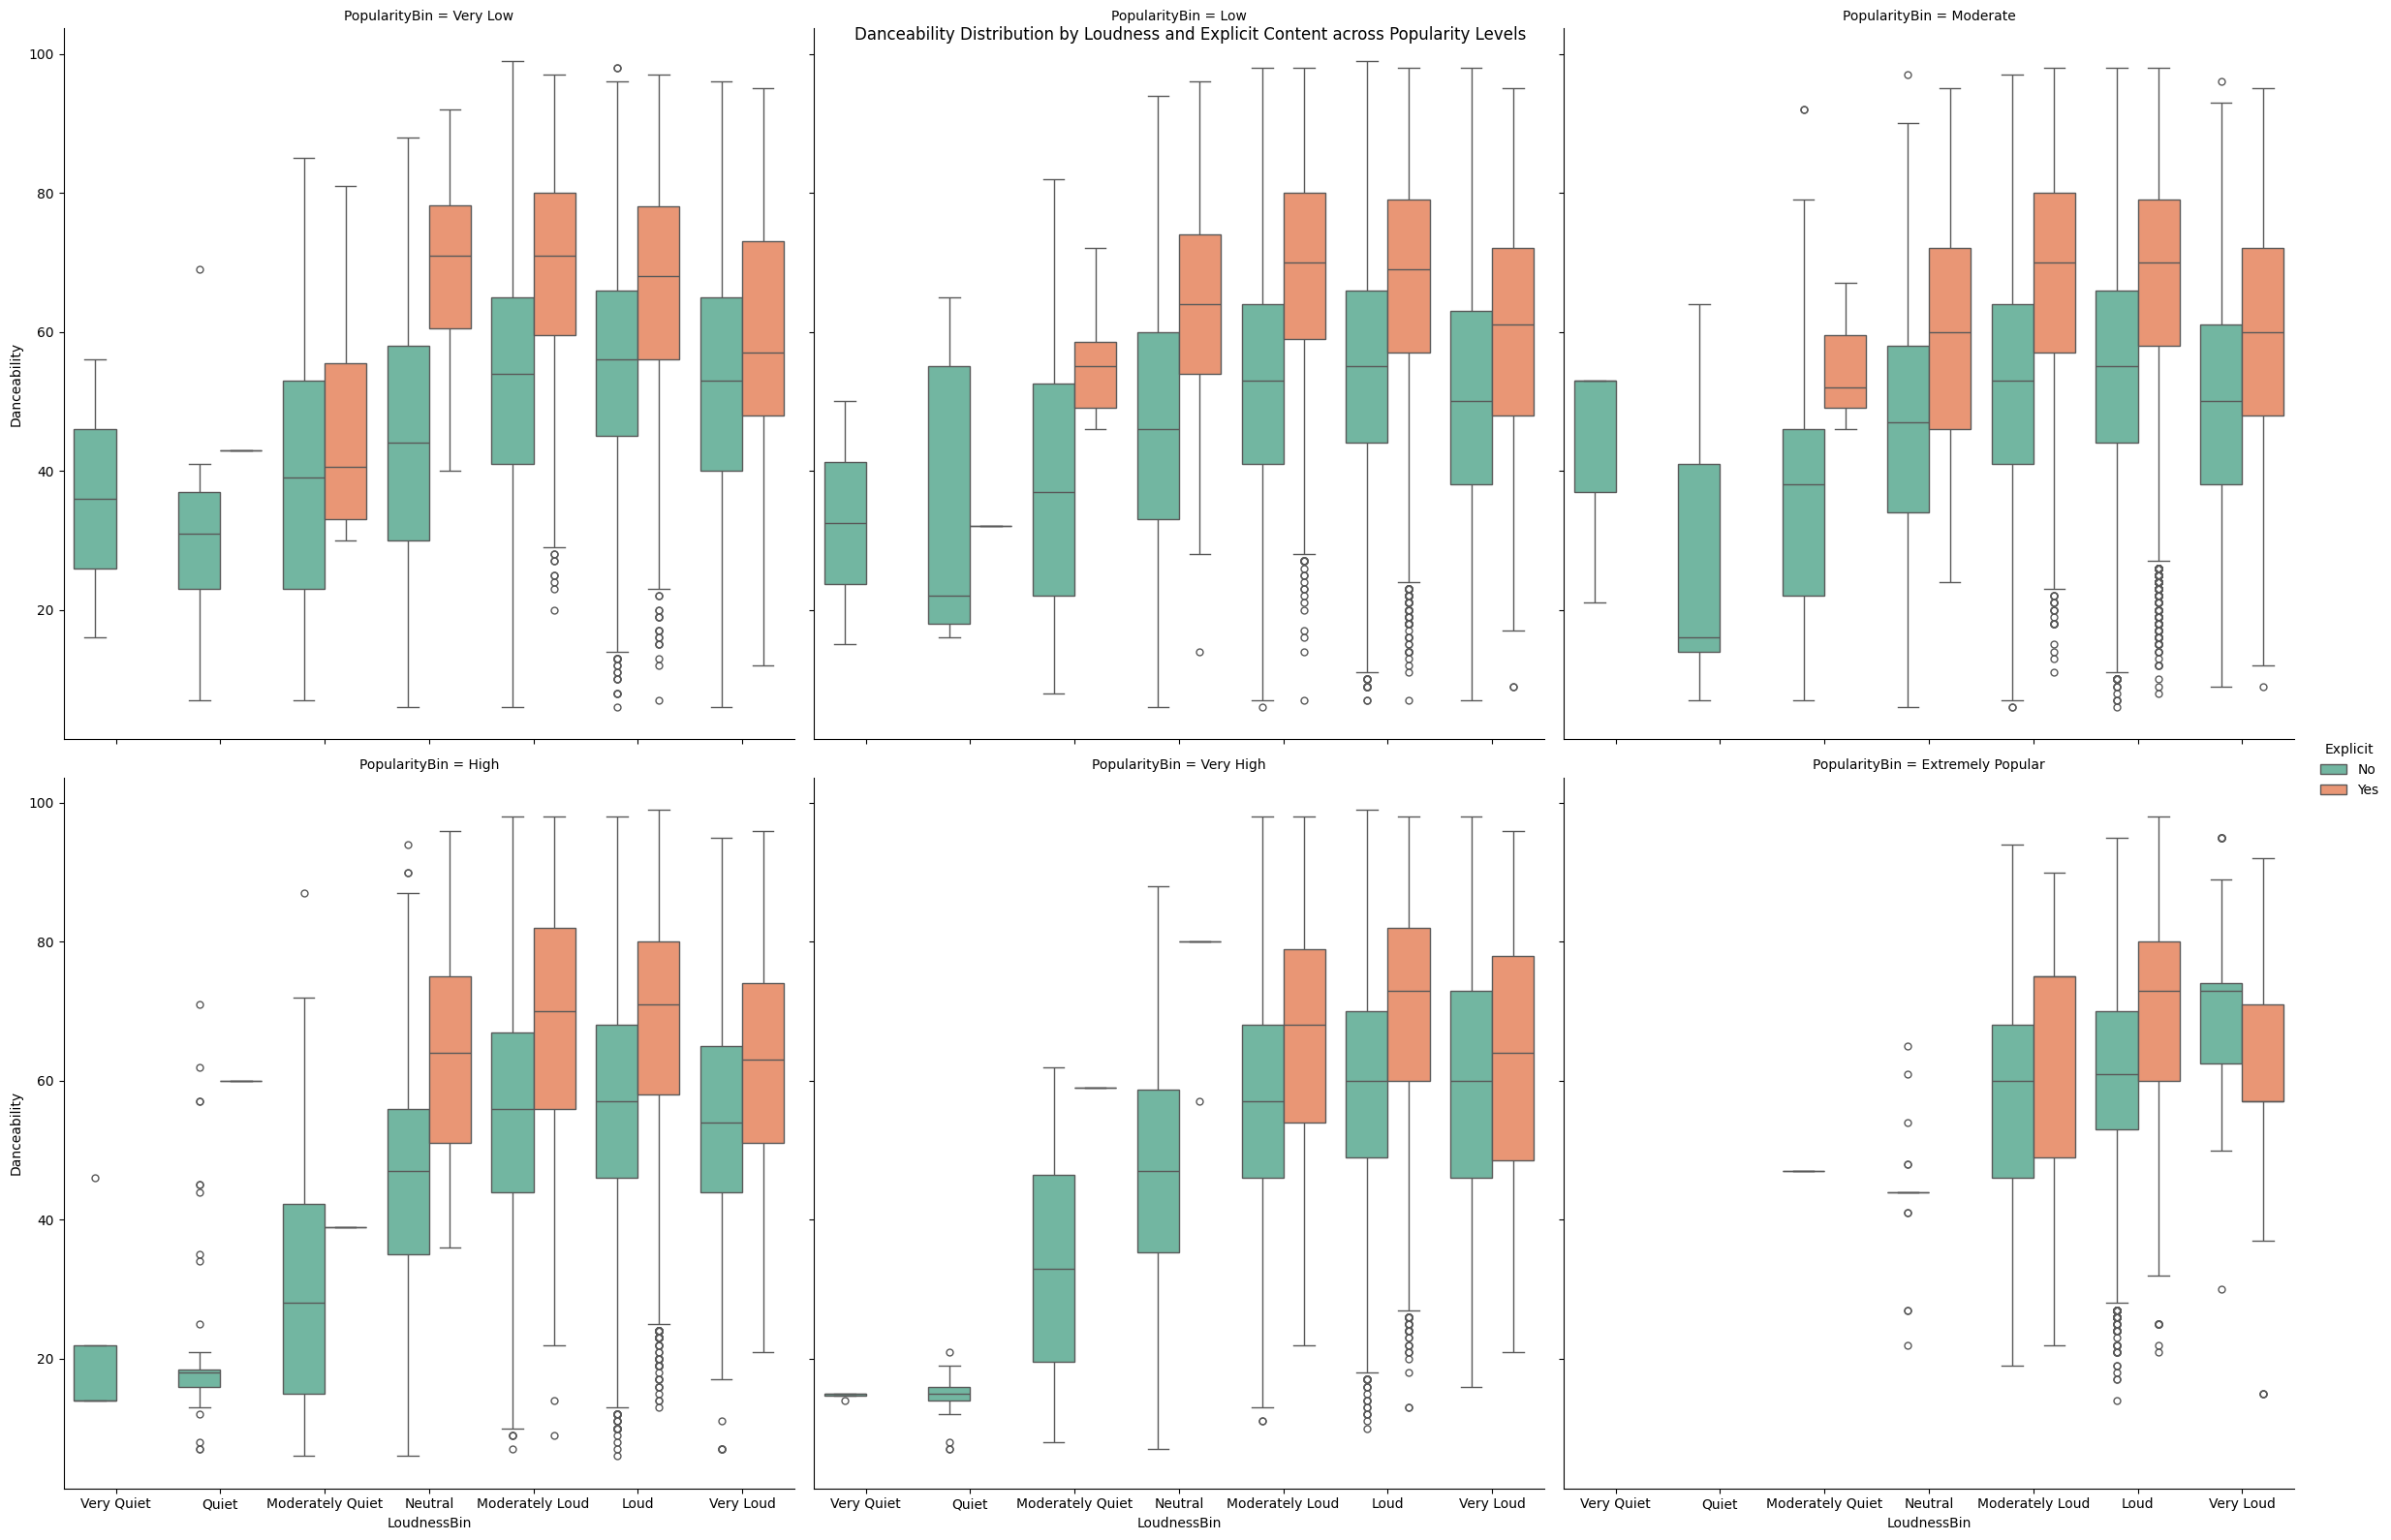

In [608]:
g = sns.catplot(
    data=df,
    x='LoudnessBin', y='Danceability',
    hue='Explicit',
    col='PopularityBin',  # Facets by popularity
    kind='box',
    height=8, aspect=1,
    col_wrap=3,           # Controls how many plots per row
    palette='Set2'
)
# g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Danceability Distribution by Loudness and Explicit Content across Popularity Levels")


Text(0.5, 0.98, 'Danceability Distribution by Loudness and Explicit Content across Emotion Levels')

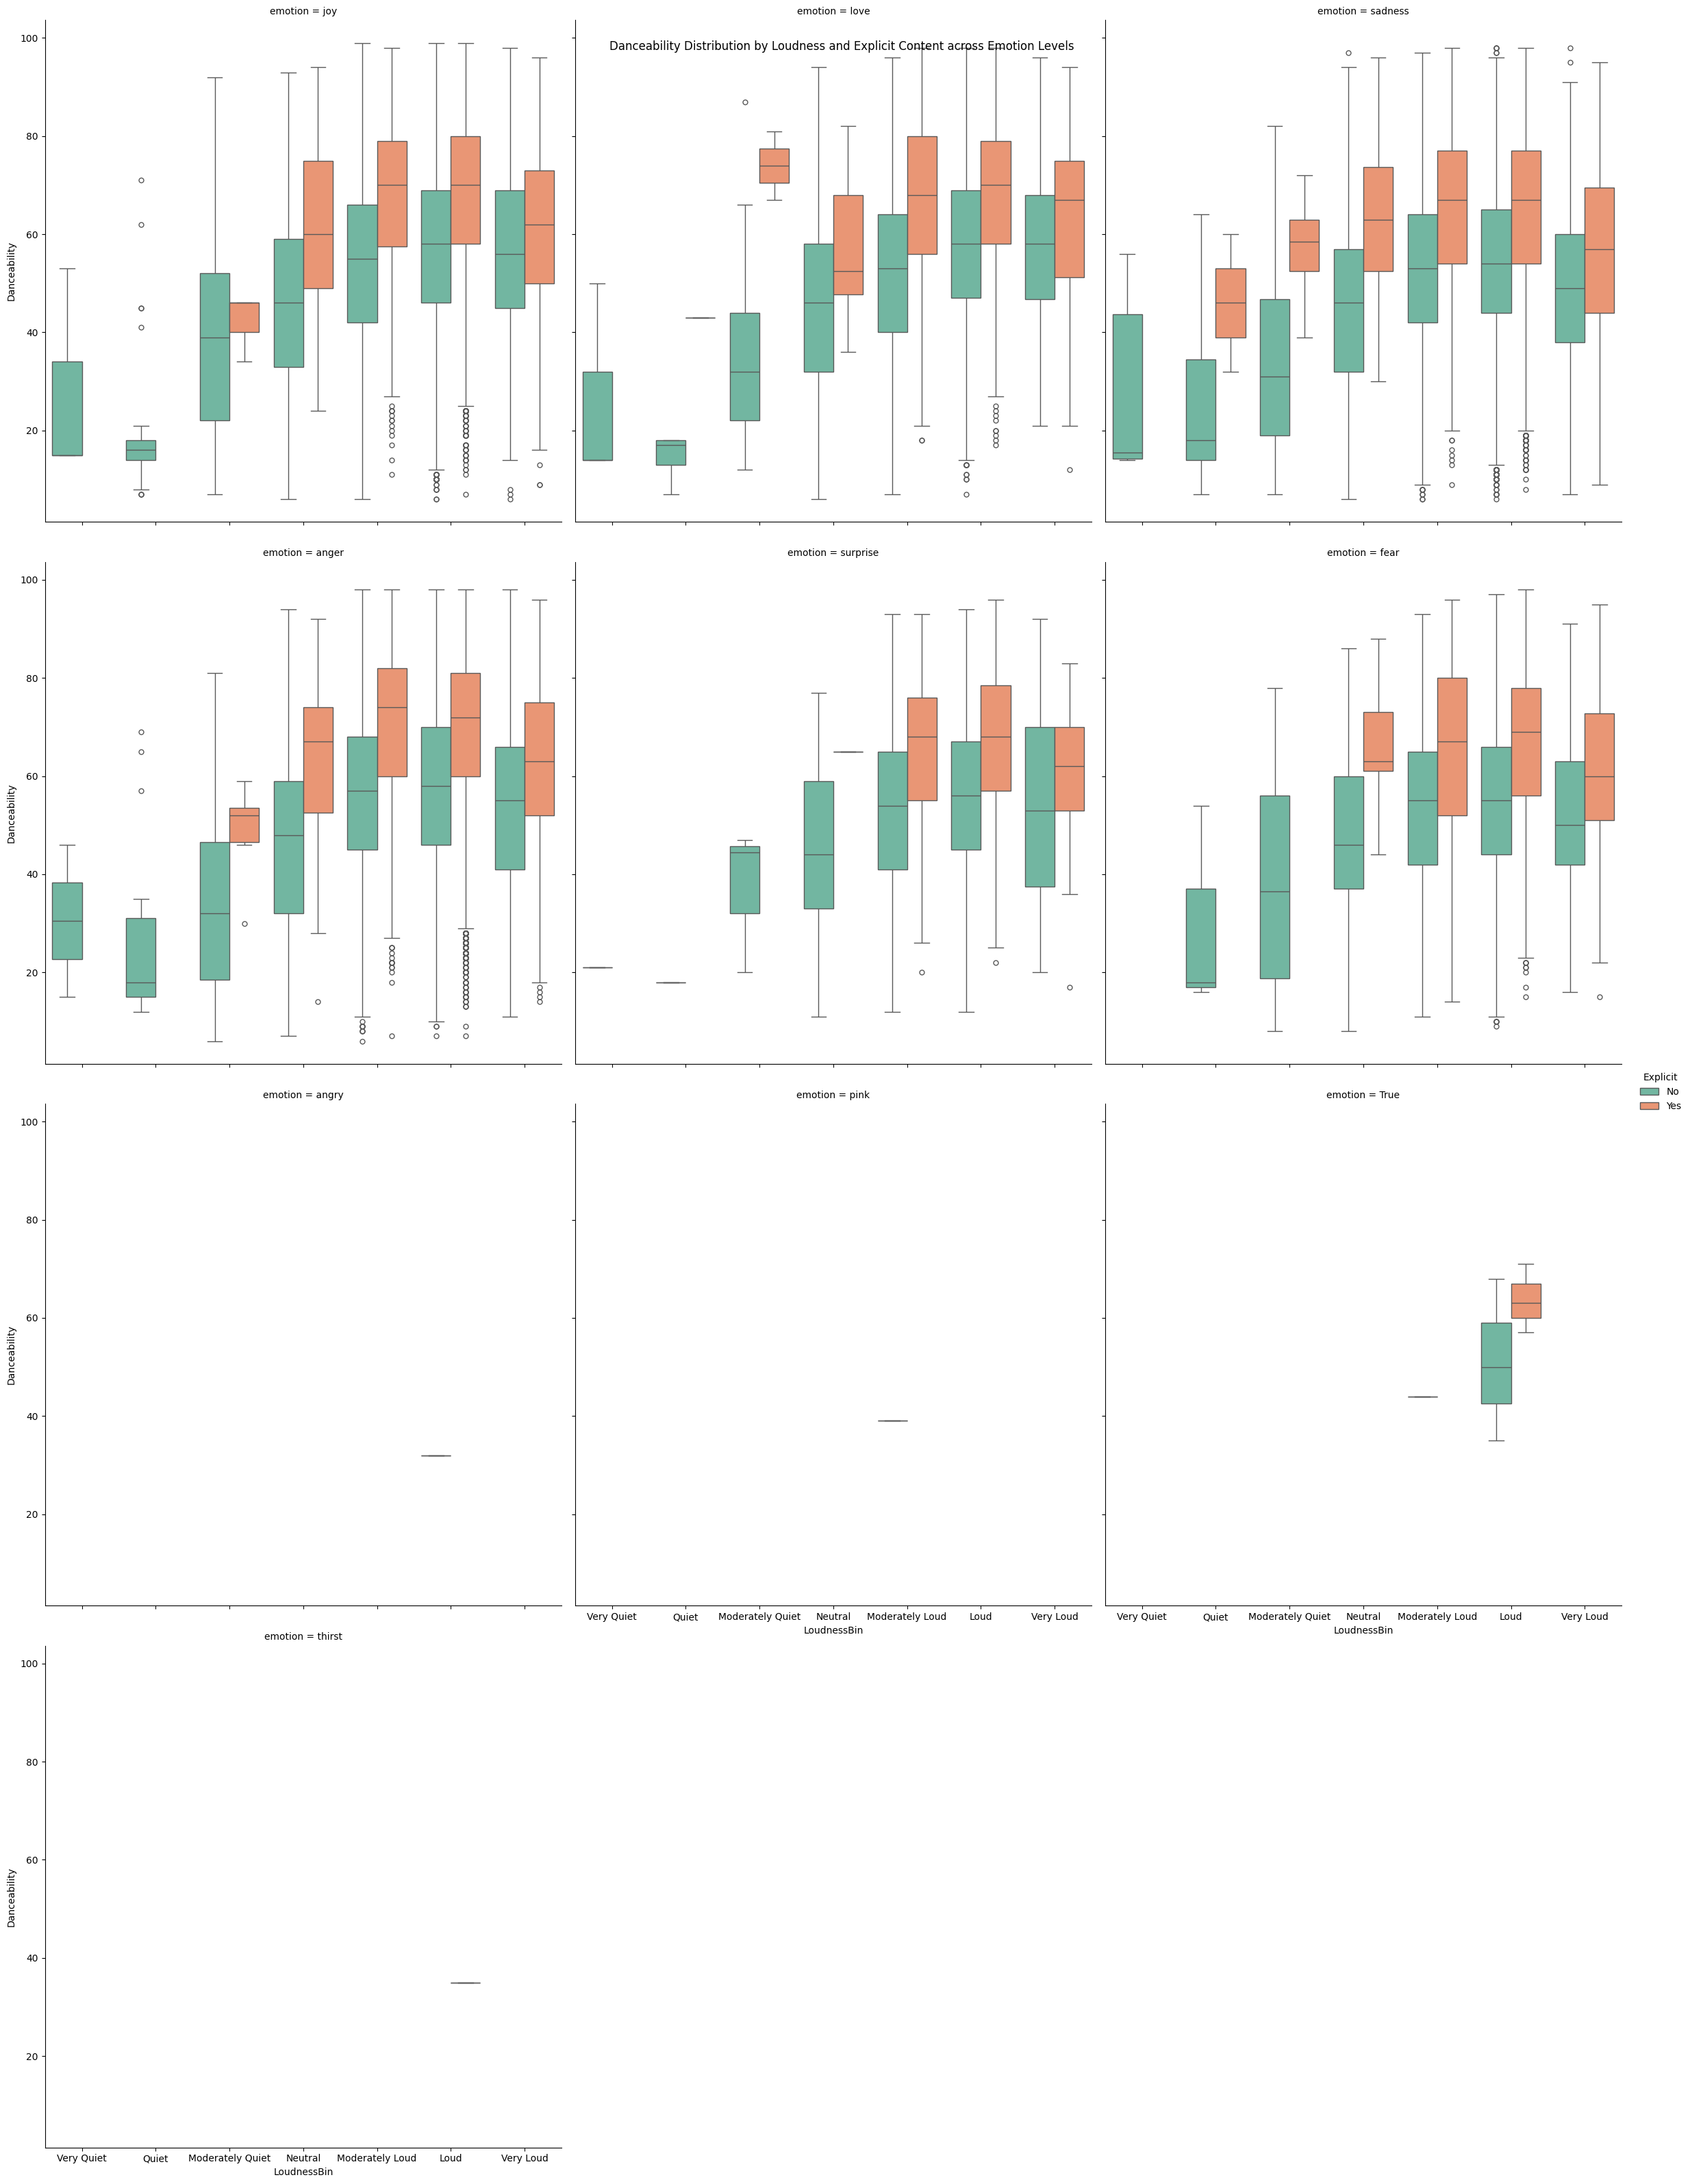

In [609]:
g_1 = sns.catplot(
    data=df,
    x='LoudnessBin', y='Danceability',
    hue='Explicit',
    col='emotion',  # Facets by emotions
    kind='box',
    height=8,
    col_wrap=3,           # Controls how many plots per row
    palette='Set2'
)
# g.fig.subplots_adjust(top=0.85)
g_1.fig.suptitle("Danceability Distribution by Loudness and Explicit Content across Emotion Levels")


In [610]:
emotion_counts = df.groupby(['emotion','Genre']).size().reset_index(name='count')
print(emotion_counts)

most_common_emotion = emotion_counts.loc[emotion_counts.groupby('Genre')['count'].idxmax()].reset_index(drop=True)
print(most_common_emotion)

       emotion                    Genre  count
0         True  Unknown,Unknown,Unknown      2
1         True                  hip-hop      1
2         True                    metal      2
3         True                      rap      1
4         True                     soul      1
...        ...                      ...    ...
3677  surprise                     soul     86
3678  surprise               soundtrack     36
3679  surprise                     xmas      1
3680  surprise      ypp,Unknown,Unknown      1
3681    thirst                      pop      1

[3682 rows x 3 columns]
       emotion                                      Genre  count
0          joy                -j013fh,1208fh,any old iron      1
1      sadness         00s,2001,critically acclaimed song      1
2          joy                  00s,indie,be-my-baby drum      1
3         love               1,2015 single,linedance 2015      1
4      sadness                        10s,Unknown,Unknown      1
...        ...       

In [611]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['Danceability', 'Energy', 'Positiveness']
X = df[features].dropna()

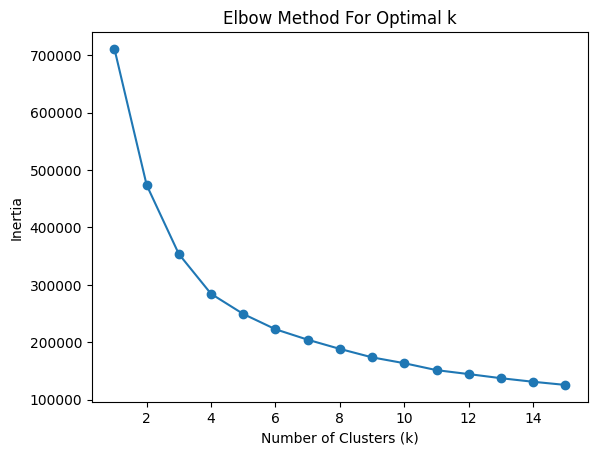

In [612]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(1, 16)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [613]:
k = 8  # Assume you chose 4 from the elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster_KM'] = kmeans.fit_predict(X_scaled)


In [614]:
# Average feature values for each cluster
cluster_summary = df.groupby('Cluster_KM')[features].mean()
print(cluster_summary)


            Danceability     Energy  Positiveness
Cluster_KM                                       
0              37.224588  83.054645     29.967860
1              66.209882  44.358581     67.666850
2              34.401780  26.582990     20.074913
3              54.284271  41.938880     28.628092
4              76.874851  73.116263     76.778789
5              62.410155  75.195532     40.010983
6              79.204994  53.809146     34.544019
7              52.073962  81.922179     68.982158


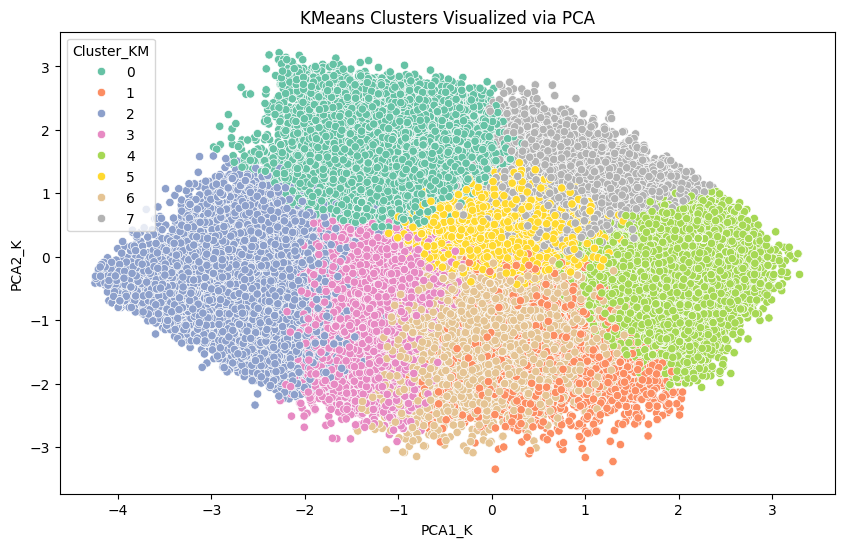

In [615]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1_K'] = X_pca[:,0]
df['PCA2_K'] = X_pca[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PCA1_K', y='PCA2_K', hue='Cluster_KM', palette='Set2')
plt.title('KMeans Clusters Visualized via PCA')
plt.show()


In [616]:
print(df.head())

  artist                   song  emotion  variance Genre  Release Date  \
0   ABBA  She's My Kind Of Girl      joy  0.447619   pop          2014   
1   ABBA       Andante, Andante     love  0.202222   pop          1980   
2   ABBA         As Good As New  sadness  0.300881   pop          1979   
3   ABBA                   Bang      joy  0.355000   pop          1975   
4   ABBA       Bang-A-Boomerang      joy  0.355000   pop          1975   

      Key  Tempo  Loudness Explicit  ...  Positiveness  Speechiness  Liveness  \
0   F Maj    128     -6.00       No  ...            60            3        31   
1  A# Maj    102    -10.72       No  ...            38            2         7   
2   E Maj    139     -5.70       No  ...            97            3         8   
3   F Maj    132     -3.00       No  ...            89            3        32   
4   F Maj    132     -3.00       No  ...            89            3        32   

   Acousticness  Instrumentalness  PopularityBin      LoudnessBin  C

In [617]:
print(df['Cluster_KM'])

0         7
1         3
2         4
3         7
4         7
         ..
236983    0
236984    4
236985    5
236986    4
236987    0
Name: Cluster_KM, Length: 236988, dtype: int32


In [618]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

features = ['Danceability','Energy','Positiveness']
X = df[features]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [619]:
k = 5
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

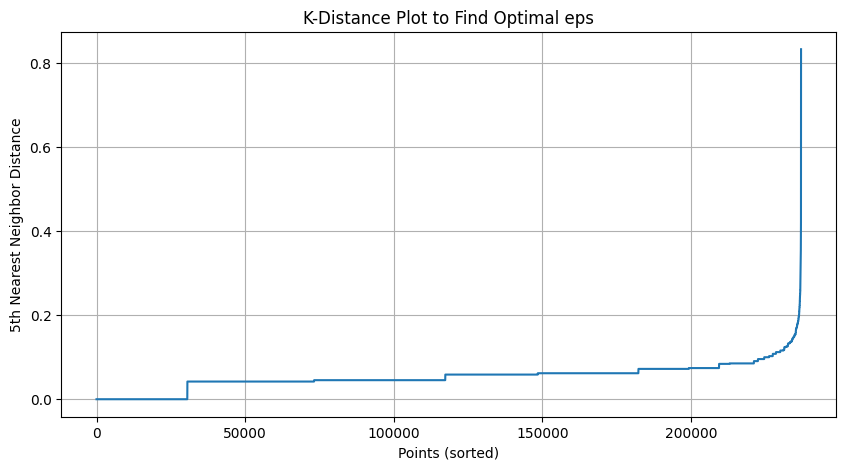

In [620]:
k_distances = np.sort(distances[:, k-1])  # kth distance (4th index if k=5)

plt.figure(figsize=(10, 5))
plt.plot(k_distances)
plt.xlabel("Points (sorted)")
plt.ylabel(f"{k}th Nearest Neighbor Distance")
plt.title("K-Distance Plot to Find Optimal eps")
plt.grid(True)
plt.show()

In [621]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X_scaled)

df['DBSCAN_Cluster'] = dbscan.labels_

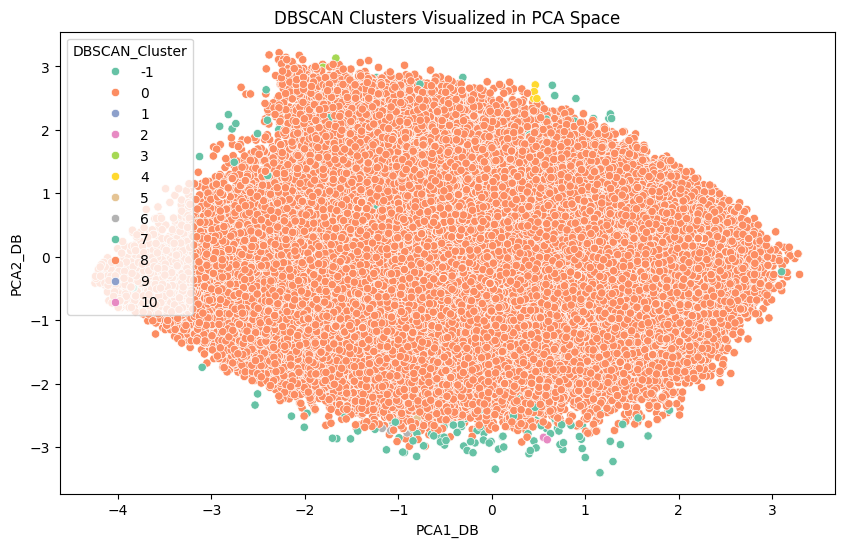

In [622]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1_DB'] = X_pca[:, 0]
df['PCA2_DB'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1_DB', y='PCA2_DB', hue='DBSCAN_Cluster', palette='Set2')
plt.title("DBSCAN Clusters Visualized in PCA Space")
plt.show()

In [623]:
df.to_csv('spotify_data_modified.csv', index=False)